In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

NameError: name 'pd' is not defined

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.duplicated().sum()

0

In [6]:
 data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

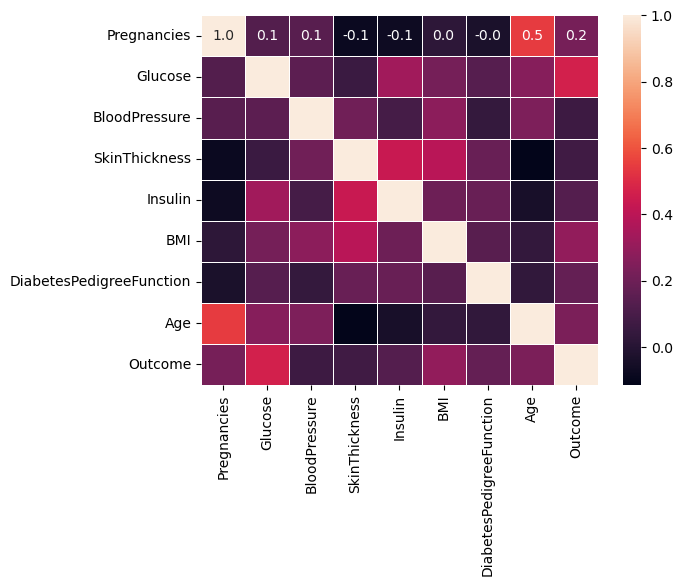

In [7]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidths=0.5)

<Axes: >

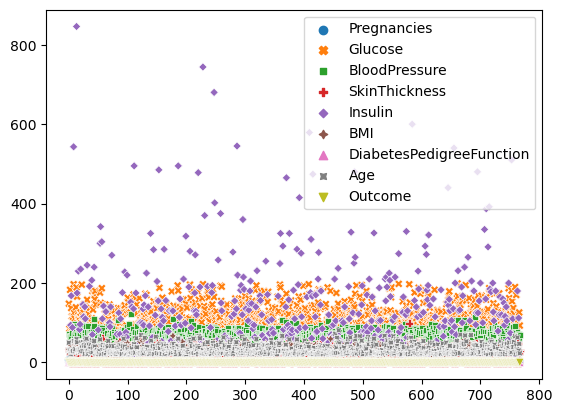

In [8]:
sns.scatterplot(data=data)

<Axes: xlabel='Outcome', ylabel='count'>

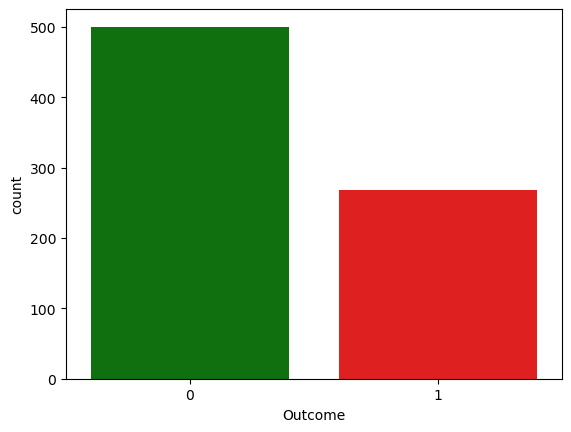

In [9]:
sns.countplot(x='Outcome',data=data ,palette=['g','r'])

In [10]:
datmax=data[data['Outcome']==0]
datmin=data[data['Outcome']==1]
datmax.shape,datmin.shape

((500, 9), (268, 9))

C:\Users\pc\AppData\Local\Temp\ipykernel_25072\2854357366.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Pregnancies"])
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


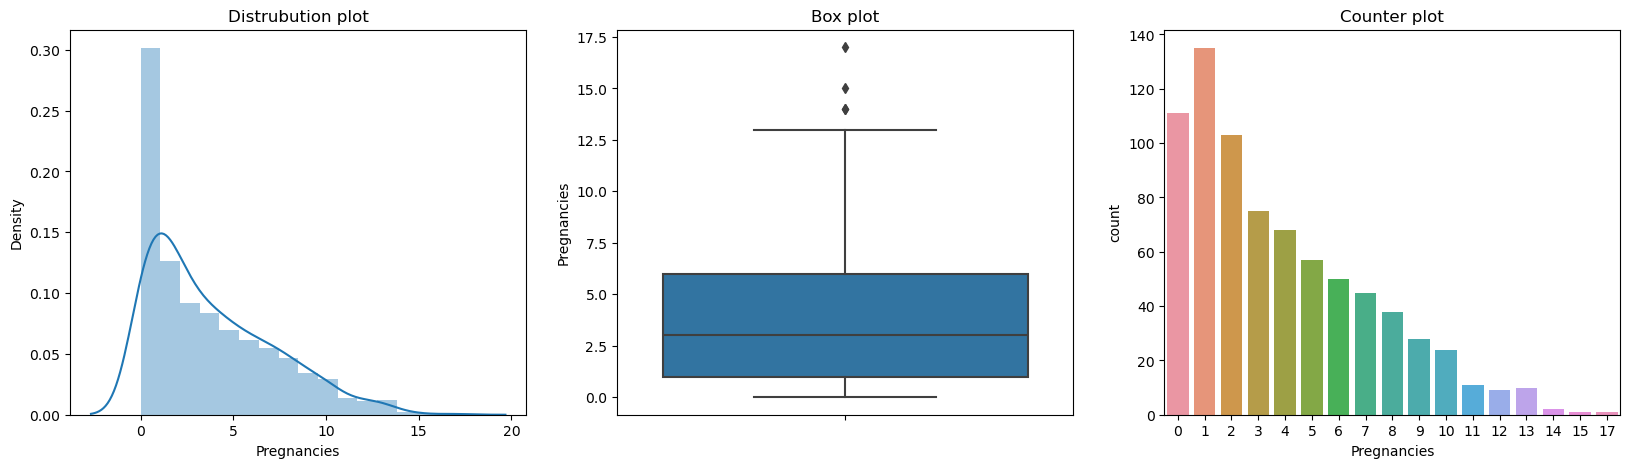

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Distrubution plot')
sns.distplot(data["Pregnancies"])


plt.subplot(1,3,2)
plt.title('Box plot')
sns.boxplot(y=data["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Counter plot')
sns.countplot(x='Pregnancies',data=data)

plt.show()

<Axes: ylabel='Age'>

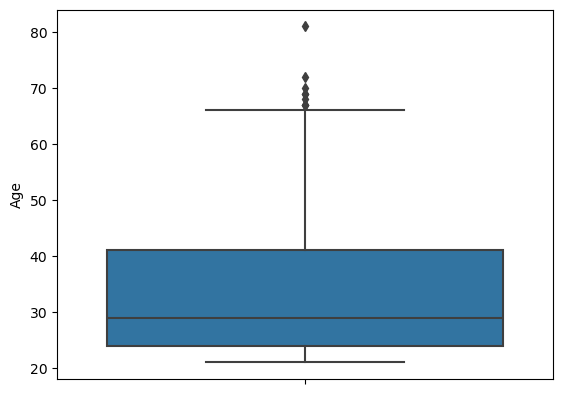

In [12]:
sns.boxplot(y='Age',data=data)

In [13]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']


In [22]:
rm=RandomOverSampler(random_state=22)
x_res,y_res=rm.fit_resample(x,y)

In [23]:
print('old data shape{} : '.format(Counter(y)))
print('old data shape{} : '.format(Counter(y_res)))

old data shapeCounter({0: 500, 1: 268}) : 
old data shapeCounter({1: 500, 0: 500}) : 


In [15]:
xt,xts,yt,yts=train_test_split(x,y,test_size=0.2,random_state=22)

In [16]:
model1=DecisionTreeClassifier()
model2=KNeighborsClassifier(n_neighbors = 4)

In [17]:
columns=['DecisionTreeClassifier','KNeighborsClassifier']
res1=[]
res2=[]
res3=[]

In [24]:
def cal(model):
    model.fit(xt,yt)
    pre1=model.predict(xts)
    accuracy=accuracy_score(pre1,yts)
    recall=recall_score(pre1,yts)
    f1=f1_score(pre1,yts)
    
    res1.append(accuracy)
    res2.append(recall)
    res3.append(f1)
    
   # sns.heatmap(confusion_matrix(pre1,ys),annot=True)
    print(model)
    #print(confusion_matrix(pre1,ys))
   # print(classification_report(pre1,ys))
    print('accuracy is :',accuracy,'\nrecall is :',recall,'\nf1_score is ',f1,'\nclassification_report : \n',
          classification_report(pre1,yts),'\nconfusion_matrix : \n',confusion_matrix(pre1,yts))
cal(model1)

DecisionTreeClassifier()
accuracy is : 0.7532467532467533 
recall is : 0.6481481481481481 
f1_score is  0.6481481481481481 
classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154
 
confusion_matrix : 
 [[81 19]
 [19 35]]


In [26]:
df=pd.DataFrame({'Algorithm':columns,'Accuracies ': res1,'Recall ': res2 ,'Fscore':res3})
df

,Algorithm,Accuracies,Recall,Fscore
0,DecisionTreeClassifier,0.688312,0.571429,0.500000
1,KNeighborsClassifier,0.753247,0.648148,0.648148


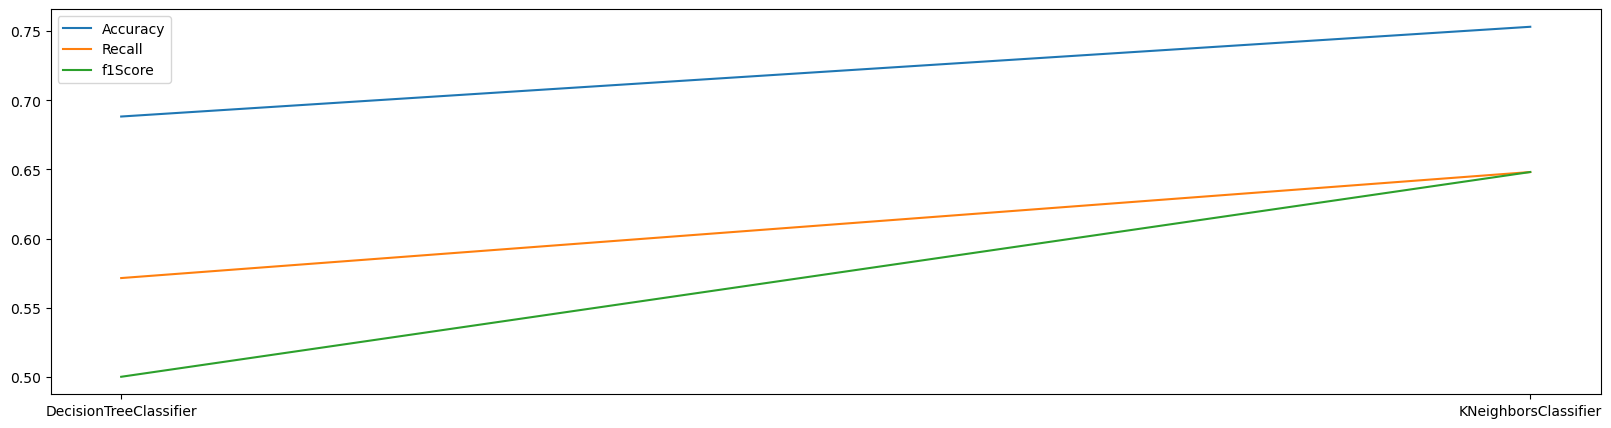

In [27]:
x=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,res1,label='Accuracy')
plt.plot(df.Algorithm,res2,label='Recall')
plt.plot(df.Algorithm,res3,label='f1Score')
plt.legend()
plt.show()